In [ ]:
import os
import pandas as pd
import numpy as np

In [315]:
os.chdir("C:/Users/Shardul Janaskar/Downloads")

Loading and Handling Time Series in Pandas.

In [316]:
df = pd.read_csv("challenge_data_20.csv",index_col = 0)
df.sort_index(axis = 1, ascending =True)

,engine_id,fuel_consumption(liter),operating_hours
time,,,
2017-12-19,8331744407,3404.8,3726
2017-12-20,8331744407,3865.6,3746
2017-12-21,8331744407,3891.2,3748
2017-12-22,8331744407,3840.0,3768
2017-12-23,8331744407,3891.2,3776
2017-12-24,8331744407,3891.2,3786
2017-12-25,8331744407,3891.2,3796
2017-12-26,8331744407,3891.2,3807
2017-12-27,8331744407,3891.2,3822


Making a dataframe of the column named opearting hours and keep the index as the date-time column

In [317]:
df.index = pd.to_datetime(df.index)
ts = df1['operating_hours']
ts = ts.resample('D').mean()
ts.head(10)

time
2017-12-19    6619.666667
2017-12-20    4637.150000
2017-12-21    4644.950000
2017-12-22    4653.650000
2017-12-23    4658.700000
2017-12-24    4662.750000
2017-12-25    4665.750000
2017-12-26    4670.100000
2017-12-27    4677.800000
2017-12-28    4684.450000
Freq: D, Name: operating_hours, dtype: float64

In [318]:
from datetime import datetime


Checking whether the time-series is stationary

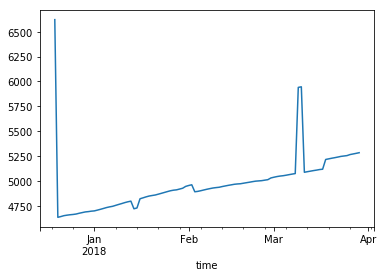

In [340]:
ts.plot()

From the above Graph it is obvious that there is an overall increase in the trend, with some seasonality in it. So to convert it into stationary problem the function below is used.

In [345]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Now let’s parse our time series data into this function:

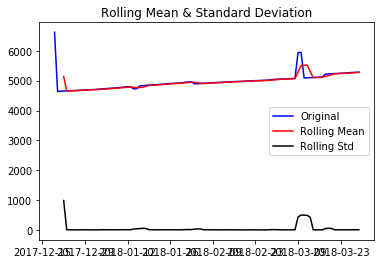

Results of Dickey-Fuller Test:
Test Statistic                 -1.071478
p-value                         0.726311
#Lags Used                      6.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [346]:
test_stationarity(ts)

This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.


MAKING THE TIME SERIES STATIONARY :
There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

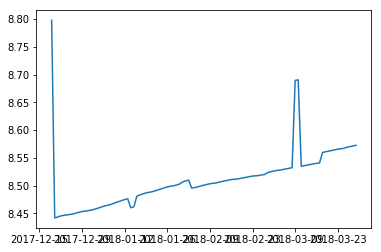

In [347]:
ts_log = np.log(ts)
plt.plot(ts_log)

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. I will be using Smoothing. 
In smoothing we usually take the past few instances (rolling estimates) We will discuss two methods under smoothing- Moving average and Exponentially weighted moving average.

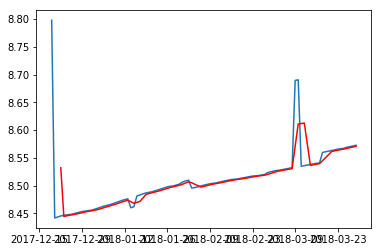

In [348]:
moving_avg =ts_log.rolling(4).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color = 'red')

Now subtract the rolling mean from the original series.

In [349]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

time
2017-12-19         NaN
2017-12-20         NaN
2017-12-21         NaN
2017-12-22   -0.086743
2017-12-23    0.002169
Freq: D, Name: operating_hours, dtype: float64

In [350]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

time
2017-12-22   -0.086743
2017-12-23    0.002169
2017-12-24    0.001662
2017-12-25    0.001188
2017-12-26    0.001238
Freq: D, Name: operating_hours, dtype: float64

Now let’s parse it to the function to check for stationarity.



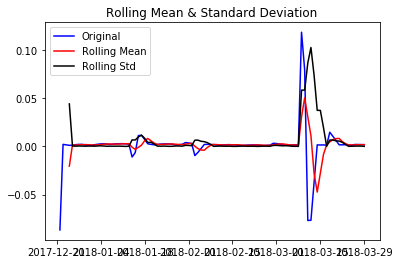

Results of Dickey-Fuller Test:
Test Statistic                -6.015075e+00
p-value                        1.540607e-07
#Lags Used                     5.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


In [351]:
test_stationarity(ts_log_moving_avg_diff)

We notice two things:

• The rolling values are varying slightly but there is no specific trend.

• The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

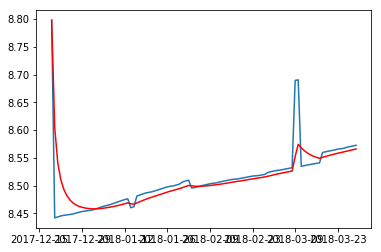

In [344]:
expwighted_avg = ts_log.ewm(halflife=4).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color = 'red')

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

I Have used Differencing 

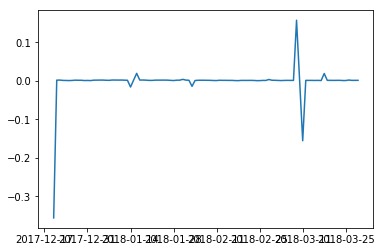

In [352]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

 parse it using our stationary testing function

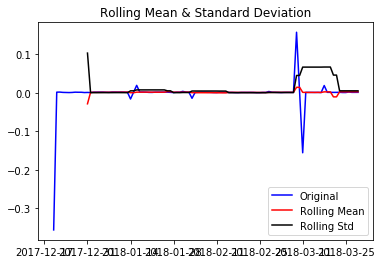

Results of Dickey-Fuller Test:
Test Statistic                -6.157017e+00
p-value                        7.326843e-08
#Lags Used                     5.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


In [329]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

It is stationary

Decomposition
Here we can see there is an upward trend. We can use statsmodels to perform a decomposition of this time series. The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

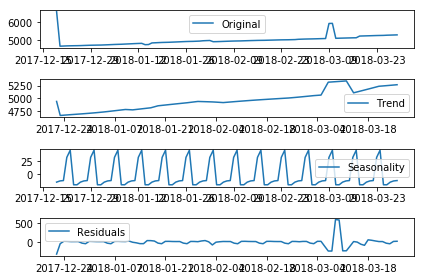

In [330]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts)
plt.subplot(411)
plt.plot(ts,label ='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [331]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

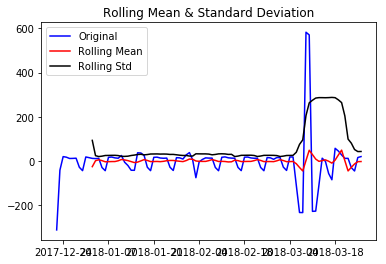

Results of Dickey-Fuller Test:
Test Statistic                -5.817627e+00
p-value                        4.255765e-07
#Lags Used                     9.000000e+00
Number of Observations Used    8.500000e+01
Critical Value (1%)           -3.509736e+00
Critical Value (5%)           -2.896195e+00
Critical Value (10%)          -2.585258e+00
dtype: float64


In [332]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Forecasting a Time Series

We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.

We will use 3 different ARIMA models considering individual as well as combined effects.

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

Text(0.5,1,'RSS:0.1908')

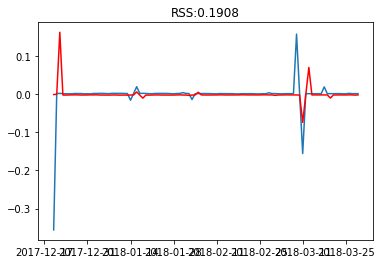

In [333]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit(disp =-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color = 'red')
plt.title('RSS:%.4f' % sum((results_AR.fittedvalues - ts_log_diff)**2))

Text(0.5,1,'RSS: 0.1908')

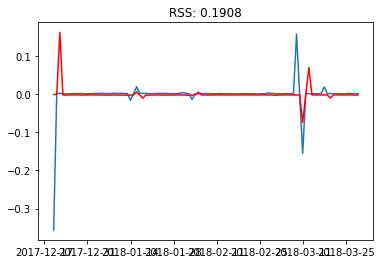

In [334]:

model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit(disp =-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Text(0.5,1,'RSS: 0.2178')

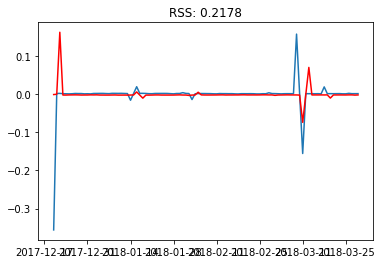

In [335]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp =1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


RSS values:

• AR= 0.1908

• MA= 0.1908

• ARIMA =0.2178

AR and MA have the best RSS values.

Now the final step

• First get the predicted values and store it as series. You will notice the first month is missing because we took a lag of 1(shift).

• Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value 

In [336]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy =True)
print(predictions_ARIMA.head())

time
2017-12-20    0.000898
2017-12-21    0.011212
2017-12-22    0.161267
2017-12-23    0.004417
2017-12-24    0.110925
Freq: D, dtype: float64


In [337]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

time
2017-12-20    0.000898
2017-12-21    0.012109
2017-12-22    0.173377
2017-12-23    0.177793
2017-12-24    0.288718
Freq: D, dtype: float64


In [338]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Shardul Janaskar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



time
2017-12-19    8.797800
2017-12-20    8.798698
2017-12-21    8.809910
2017-12-22    8.971177
2017-12-23    8.975594
Freq: D, dtype: float64

• Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.

Now plot the predicted values with the original.

• Find the RMSE

Text(0.5,1,'RMSE:10175.7836')

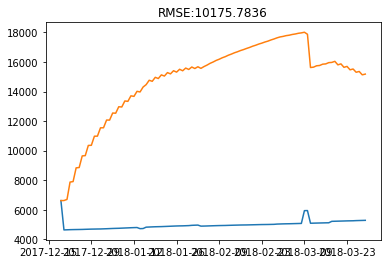

In [339]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE:%.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

The result can be further refined to get a better model.